In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
%matplotlib inline
filterwarnings('ignore')

import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
from statistics import mean, stdev
from math import sqrt

In [2]:
df = pd.read_csv('Pies vs Waffles_May 3, 2018_21.52 2.csv', skiprows = [0,1])

In [3]:
print("Total Number of Surveys = ", len(df))

Total Number of Surveys =  210


In [4]:
# rename columns
old_names = df.columns
new_names = []
for old_name in old_names:
    new_name = eval(old_name)['ImportId']
    new_names.append(new_name)
    
df.columns = new_names

In [5]:
def plot_distributions(list_to_graph, list_names, x, y, title, real_val, print_val = True, file_im = "images/something.png"):
    fig, ax = plt.subplots()
    for i, data in enumerate(list_to_graph):
        sns.set_style("white")
        sns.distplot(data, hist = False, kde_kws={"label":list_names[i]})
    ax.set(xlabel= x, ylabel= y)
    ax.set_title(title, size=12.5, weight='bold')
    if print_val:
        ax.axvline(x=real_val, linewidth=1, color='r')
        lim_y = ax.get_ylim()
        lim_x = ax.get_xlim()
        plt.text(real_val - ((lim_y[1] - lim_y[0])/7) , (lim_y[1] - lim_y[0])/10,'value', rotation = 90)
    
    plt.savefig(file_im)

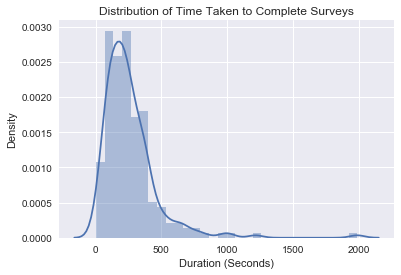

In [6]:
# plot time taken to complete each survey
def make_plot(df, col_name, x, y, title):
    ax = sns.distplot(df[col_name])
    ax.set(xlabel= x, ylabel= y)
    ax.set_title(title)
    plt.savefig("images/one.png")

        
make_plot(df, 'duration', 'Duration (Seconds)', 'Density', "Distribution of Time Taken to Complete Surveys")

## Question 1

### Does the perception of one slice/area depend on the size of the other slices/areas?

In [7]:
pie1 = df[(df['QID1_1'].notnull())]['QID1_1']
pie2 = df[(df['QID3_1'].notnull())]['QID3_1']
pie3 = df[(df['QID4_1'].notnull())]['QID4_1']
pie4 = df[(df['QID5_1'].notnull())]['QID5_1']
pies = [pie1, pie2, pie3, pie4]
waffle1 = df[(df['QID7_1'].notnull())]['QID7_1']
waffle2 = df[(df['QID8_1'].notnull())]['QID8_1']
waffle3 = df[(df['QID9_1'].notnull())]['QID9_1']
waffle4 = df[(df['QID10_1'].notnull())]['QID10_1']
waffles = [waffle1, waffle2, waffle3, waffle4]

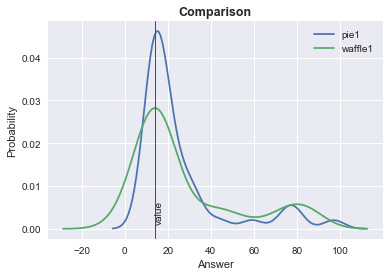

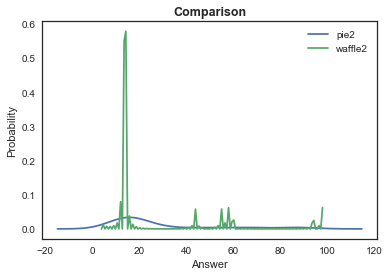

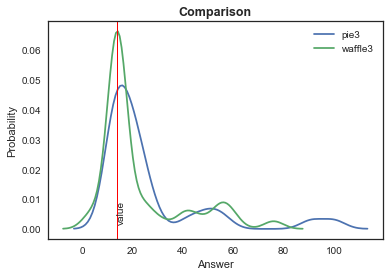

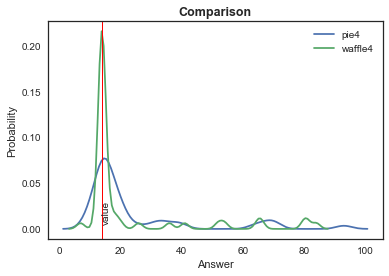

In [8]:
# Among categories
names = ["pie1", "waffle1"]
plot_distributions([pie1, waffle1], names, "Answer", "Probability", "Comparison", 14, True, "images/two.png")

names = ["pie2", "waffle2"]
plot_distributions([pie2, waffle2], names, "Answer", "Probability", "Comparison", 14, False, "images/three.png")

names = ["pie3", "waffle3"]
plot_distributions([pie3, waffle3], names, "Answer", "Probability", "Comparison", 14, True, "images/four.png")

names = ["pie4", "waffle4"]
plot_distributions([pie4, waffle4], names, "Answer", "Probability", "Comparison", 14, True, "images/five.png")

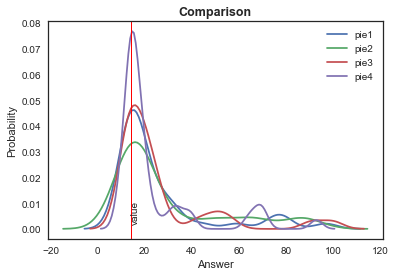

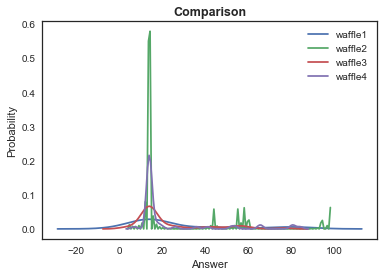

In [9]:
# Intercategory
names = ["pie1", "pie2", "pie3", "pie4"]
plot_distributions(pies, names, "Answer", "Probability", "Comparison", 14, True, "images/six.png")

names = ["waffle1", "waffle2", "waffle3", "waffle4"]
plot_distributions(waffles, names, "Answer", "Probability", "Comparison", 14, False, "images/seven.png")

## Question 2 : Total number of observations

In [10]:
pie1000 = df[(df['QID13_1'].notnull())]['QID13_1']
pie874 = df[(df['QID14_1'].notnull())]['QID14_1']
pies = [pie1000,pie874]
waffle1000 = df[(df['QID18_1'].notnull())]['QID18_1']
waffle874 = df[(df['QID19_1'].notnull())]['QID19_1']
waffles = [waffle1000,waffle874]

In [11]:
pie1000 = df[(df['QID13_1'].notnull())]['QID13_1']
pie874 = df[(df['QID14_1'].notnull())]['QID14_1']
pies = [pie1000,pie874]
waffle1000 = df[(df['QID18_1'].notnull())]['QID18_1']
waffle874 = df[(df['QID19_1'].notnull())]['QID19_1']
waffles = [waffle1000,waffle874]

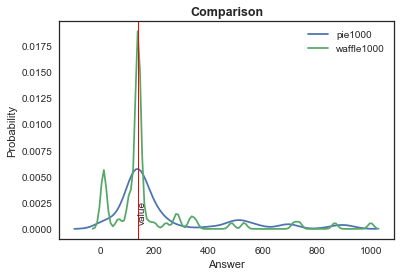

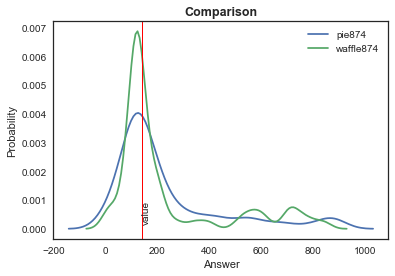

In [12]:
# Pie Vs Waffle
names = ["pie1000", "waffle1000"]
plot_distributions([pie1000, waffle1000], names, "Answer", "Probability", "Comparison", 140, True, "images/eight.png")

names = ["pie874", "waffle874"]
plot_distributions([pie874, waffle874], names, "Answer", "Probability", "Comparison", 140, True, "images/nine.png")

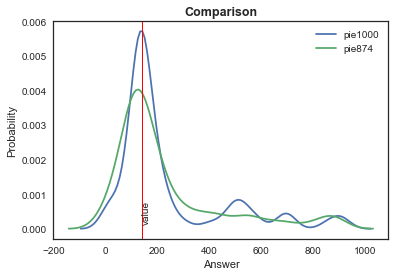

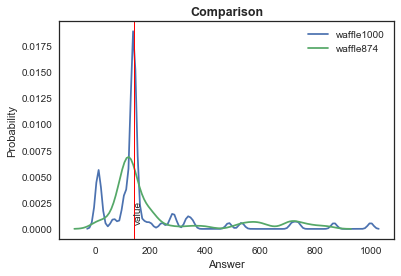

In [13]:
# Among categories
names = ["pie1000", "pie874"]
plot_distributions([pie1000, pie874], names, "Answer", "Probability", "Comparison", 140, True, "images/ten.png")

names = ["waffle1000", "waffle874"]
plot_distributions([waffle1000, waffle874], names, "Answer", "Probability", "Comparison", 140, True,"images/eleven.png")

## Question 3 

### Comparison : Adjacent vs Not

In [14]:
p1 = df[(df['QID23'].notnull())]['QID23']
p2 = df[(df['QID28'].notnull())]['QID28']
p3 = df[(df['QID29'].notnull())]['QID29']
p4 = df[(df['QID30'].notnull())]['QID30']
p5 = df[(df['QID31'].notnull())]['QID31']

w1 = df[(df['QID32'].notnull())]['QID32']
w2 = df[(df['QID33'].notnull())]['QID33']
w3 = df[(df['QID34'].notnull())]['QID34']
w4 = df[(df['QID35'].notnull())]['QID35']
w5 = df[(df['QID36'].notnull())]['QID36']

pie_adjacent = p1.append(p2).append(p3)
pie_opposite = p4.append(p5)

waffle_adjacent = w1.append(w2).append(w3)
waffle_opposite = w4.append(w5)

pies = [pie_adjacent, pie_opposite]
waffles = [waffle_adjacent, waffle_opposite]

In [15]:
def list_to_proportions(list_):
    sum_all = sum(list_)
    new_list = []
    for item in list_:
        new_list.append(item/sum_all)
    return new_list

def raw_proportions(one):
    one_df = pd.DataFrame(one).reset_index(drop=True).rename(columns={0: "cat"})
    one_df["ones"] = 1
    list_vals = list(pd.DataFrame(one_df.groupby("cat").count())["ones"])
    list_proportions = list_to_proportions(list_vals)
    
    return list_proportions

def prop_graph(one, two):
    new_1 = []
    new_2 = []
    for l in [one, two]:
        new_1.append(l[0])
        new_2.append(l[1])
    
    return new_1, new_2

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def bar_plot(N, one, two, title = 'Answers by graph', y_label = 'Proportion by answer',
             name_cat = ('pie', 'waffle'), file_im = "images/something.png"):
    ind = np.arange(N)  # the x locations for the groups
    width = 0.5     # the width of the bars
    p1 = plt.bar(ind, one , width, color='#d62728')
    p2 = plt.bar(ind, two, width, bottom=one)

    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(ind, name_cat)
    plt.legend(('Correct', 'Incorrect'))
    plt.savefig(file_im)
    plt.show()
    

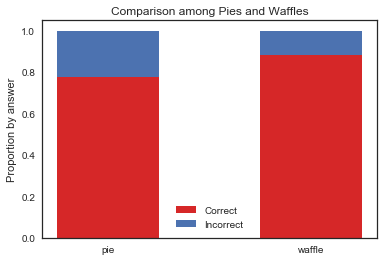

In [17]:
# Pie vs Waffle adjacent
one_aux = raw_proportions(pie_adjacent)
two_aux = raw_proportions(waffle_adjacent)
one, two = prop_graph(one_aux, two_aux)

N = 2
title = 'Comparison among Pies and Waffles'
name_cat = ('pie', 'waffle')
bar_plot(N, one, two, title = title, name_cat = name_cat, file_im = "images/twelve.png")

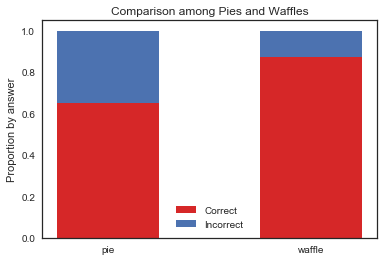

In [18]:
# Pie vs Waffle opposite
one_aux = raw_proportions(pie_opposite)
two_aux = raw_proportions(waffle_opposite)
one, two = prop_graph(one_aux, two_aux)

N = 2
title = 'Comparison among Pies and Waffles'
name_cat = ('pie', 'waffle')
bar_plot(N, one, two, title = title, name_cat = name_cat, file_im = "images/thirteen.png")

# Question 5


### Sums : Adjacent vs Not : Different Sizes

In [19]:
p1 = df[(df['QID73_1'].notnull())]['QID73_1']
p2 = df[(df['QID74_1'].notnull())]['QID74_1']
p3 = df[(df['QID75_1'].notnull())]['QID75_1']
p4 = df[(df['QID76_1'].notnull())]['QID76_1']
p5 = df[(df['QID77_1'].notnull())]['QID77_1']

w1 = df[(df['QID79_1'].notnull())]['QID79_1']
w2 = df[(df['QID80_1'].notnull())]['QID80_1']
w3 = df[(df['QID81_1'].notnull())]['QID81_1']
w4 = df[(df['QID82_1'].notnull())]['QID82_1']
w5 = df[(df['QID83_1'].notnull())]['QID83_1']

pie_adjacent = p1.append(p5)
pie_opposite = p2.append(p4).append(p3)

waffle_adjacent = w1.append(w5)
waffle_opposite = w2.append(w4).append(w3)

pies = [pie_adjacent, pie_opposite]
waffles = [waffle_adjacent, waffle_opposite]
correct = 18

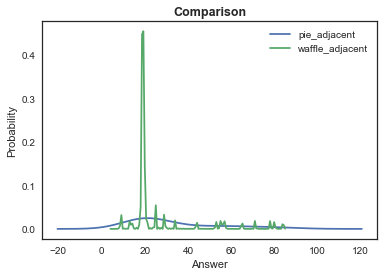

In [20]:
# Pie Vs Waffle (Adjacent)
names = ["pie_adjacent", "waffle_adjacent"]
plot_distributions([pie_adjacent, waffle_adjacent], names, "Answer", "Probability", "Comparison", 
                   18, False, "images/fourteen.png")

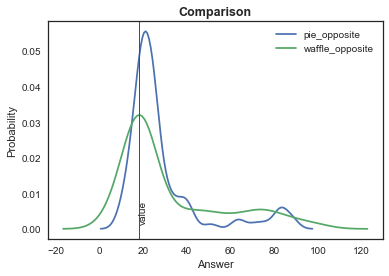

In [21]:
# Pie Vs Waffle (Opposite)
names = ["pie_opposite", "waffle_opposite"]
plot_distributions([pie_opposite, waffle_opposite], names, "Answer", "Probability", "Comparison", 
                   18, True, "images/fifthteen.png")


### Correctness of Labels

In [22]:
p1 = df[(df['QID85_1'].notnull())]['QID85_1']
p2 = df[(df['QID88_1'].notnull())]['QID88_1']
p3 = df[(df['QID89_1'].notnull())]['QID89_1']

w1 = df[(df['QID91_1'].notnull())]['QID91_1']
w2 = df[(df['QID92_1'].notnull())]['QID92_1']
w3 = df[(df['QID93_1'].notnull())]['QID93_1']

pies = [p1, p2, p3]
waffles = [w1,w2,w3]
correct = 9
# note
print("all sizes: ")
for item in [p1,p2,p3,w1,w2,w3]:
    print(len(item))

all sizes: 
52
48
59
56
48
56


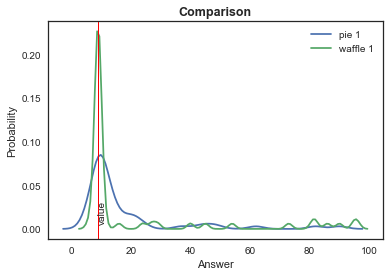

In [23]:
# Pie 1 Vs Waffle 1
names = ["pie 1", "waffle 1"]
plot_distributions([p1, w1], names, "Answer", "Probability", "Comparison", 9, 
                   True, "images/sixteen.png")



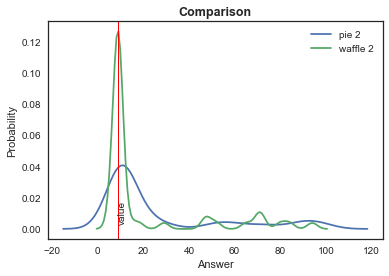

In [24]:
# Pie 2 Vs Waffle 2
names = ["pie 2", "waffle 2"]
plot_distributions([p2, w2], names, "Answer", "Probability", "Comparison", 9, 
                   True, "images/seventeen.png")



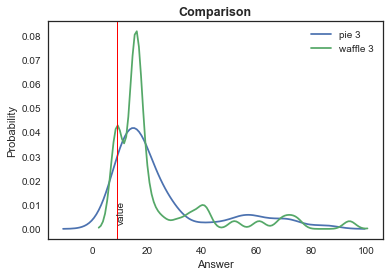

In [25]:
# Pie 3 Vs Waffle 3
names = ["pie 3", "waffle 3"]
plot_distributions([p3, w3], names, "Answer", "Probability", "Comparison", 9, 
                   True, "images/eighteen.png")



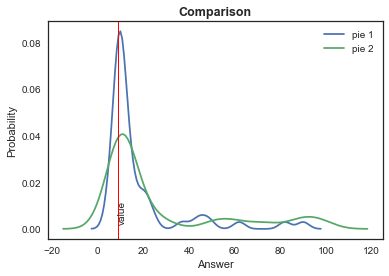

In [26]:
# Pie Vs Waffle
names = ["pie 1", "pie 2"]
plot_distributions([p1, p2], names, "Answer", "Probability", "Comparison", 9, 
                   True, "images/nineteen.png")

### FOR THIS NOTE
## Note: 1: only vanilla has wrong colour 2:  vanilla is right, everything else is wrong 3: all are wrong

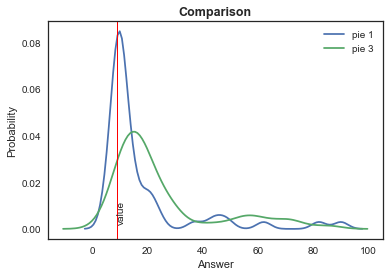

In [27]:
### FOR THIS NOT
### p1 is better than p2, stat significant, cohen's d = 0.37 (SHOULD SAY p1 vs p3)
# Pie Vs Waffle
names = ["pie 1", "pie 3"]
plot_distributions([p1, p3], names, "Answer", "Probability", "Comparison", 9, True, "images/twenty.png")